Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Do NOT add any cells to the notebook!

Make sure you fill in any place that says `YOUR CODE HERE` or _YOUR ANSWER HERE_ , as well as your name and group below:

In [1]:
NAME = "Matthäus Engelbrecht"
STUDENTID = "12318768"
GROUPID = "7"

# Assignment 5 (Group)
In Assignment 2, as a group, you trained yourselves in accessing and characterising two data sources. You also sketched out a data-science project based on these data sources. In this assignment, based on this project idea, you should select, implement, and describe 3 appropriate visualisations.

The following materials provide the necessary background:
* the slide deck on visualisations (Unit 5) and the corresponding notebook;
* Chapter 3 of "Data Science from Scratch"
* the mandatory read on "Task-Based Effectiveness of Basic Visualizations" available from MyLearn: _B. Saket, A. Endert and Ç. Demiralp (2019), "Task-Based Effectiveness of Basic Visualizations," in IEEE Transactions on Visualization and Computer Graphics, vol. 25, no. 7, pp. 2505-2512, DOI: 10.1109/TVCG.2018.2829750_

Requirements:
* Required reading: Study the paper by Saket et al. (2019) and explicitly refer to the task types, pros & cons of different visualisations as identified by these authors when answering the questions on this assignment.
* The visualisation should be appropriate the chosen tasks on the data sets.
* You should use at least two different types of visualisations. Even if two tasks in two steps below were identical (e.g., two aggregation tasks), you would be expected to choose a different visualisation for each. 
* As contrast to Assignment 2, you will be expected to use `pandas` to represent and to prepare the data sets for visualisation.
* As for the data sets collected during Assignment 2, to avoid confusion:
  * Use the genuine ones, not the manipulated ones (having anomalies introduced). 
  * If you have worked with excerpts (samples) from the original and genuine datasets, you can continue to use these. You are also free to use the complete datasets, but this is not expected.
  * Please stick to your project description in Assignment 2 when choosing tasks and corresponding visualisations.

-----
## Step 1 (6 points)

Select, implement and describe one visualisation for data source 1 (in isolation from data source 2).

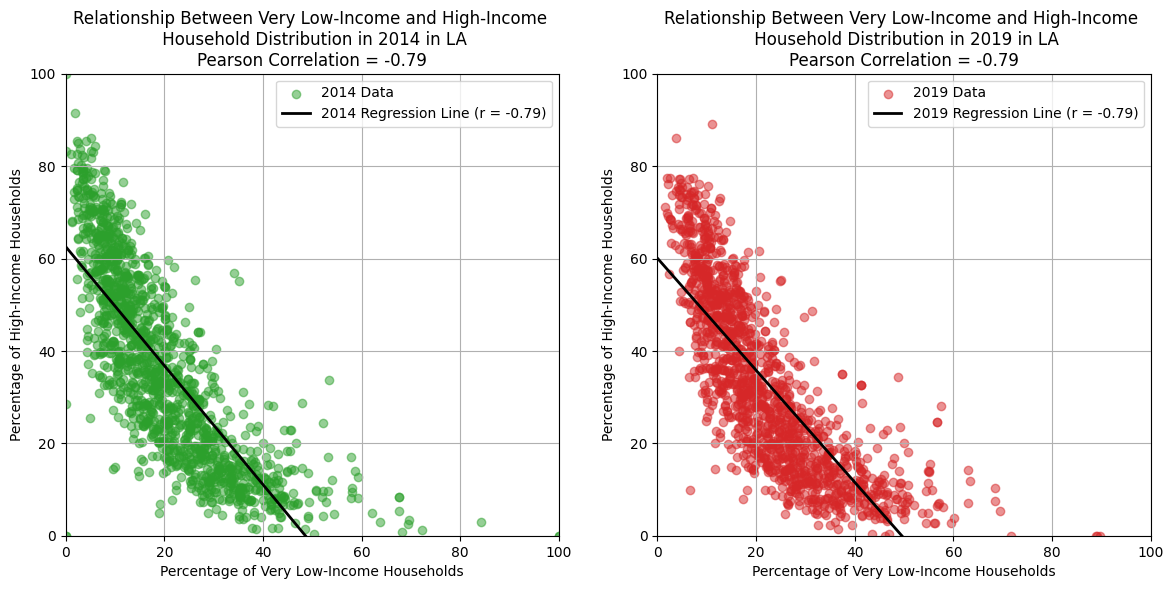

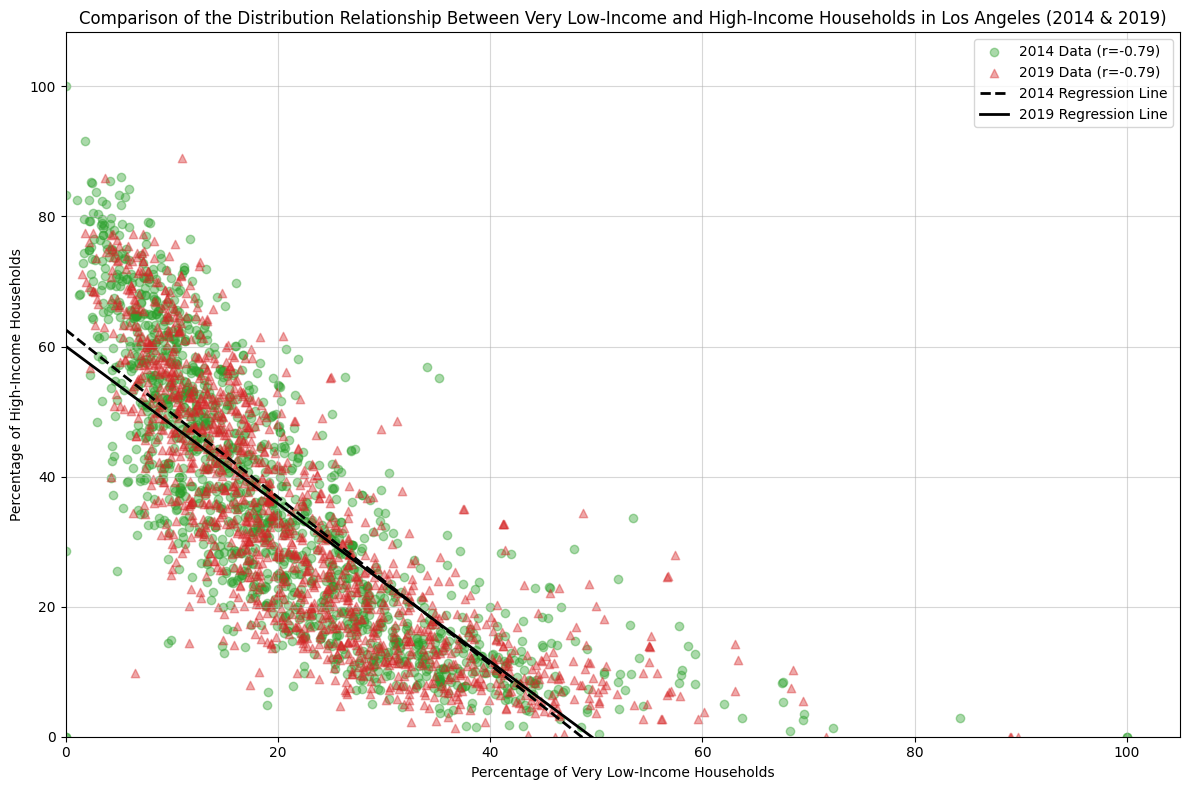

In [1]:
#all my imports that i need for this code!
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#We need to load the data from the data file
df = pd.read_csv("./data/income_data.csv")  

#I need to filter my data because i would like to compare them over a 5 year difference and I want to see any drastic difference
#first i do the dataframe from 2014
df2014 = df[df['year'] == 2014]

#since i am only looking at eli_pct and abmi_pct I will only keep those two columns
df2014 = df2014[['eli_pct', 'abmi_pct']]

#i cant use the rows if anything is missing because then i dont see the coorelation so i must drop the missing values
#citation for .dropna: https://www.w3schools.com/python/pandas/ref_df_dropna.asp
df2014 = df2014.dropna()

#secondly i take the dataframe from 2019
df2019 = df[df['year'] == 2019]

#same process - only extremely low income and above middle income.
df2019 = df2019[['eli_pct', 'abmi_pct']]

#removing any missing data
df2019 = df2019.dropna()

#here i want to calculate the pearson relationship to determite if there is a strong positive or negative relationship between two factors
#closer to 1 -> strong positive relationship between two factors
#closer to -1 -> strong negative relationship between two factors
#somewhere around 0 -> little or no relationship between two factors

#correlation for 2014 data
#citation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
r2014 = df2014['eli_pct'].corr(df2014['abmi_pct'])

#coorrelation for 2019 datat
r2019 = df2019['eli_pct'].corr(df2019['abmi_pct'])

#now i would like to make a linear regression (y = mx + b) to have a fitting line that i could put onto the data to visualize it 
#this is helpful for the overall relationship of eli and abmi 

#pearson correlation code -> it shows strength & direction of linear relationship for 2014
#source for .polyfit : https://data36.com/linear-regression-in-python-numpy-polyfit/
#i chose .polyfit because it seemed like the simplest ways of calculating it,
#others needed more line of code or they would do extra calculations which i dont need!
#save x data for 2014
x2014 = df2014['eli_pct']

#save y data for 2014
y2014 = df2014['abmi_pct']

#regression using .polyfit for 2014
regressionResult2014 = np.polyfit(x2014, y2014, 1)

#get slope and intercept
slope2014 = regressionResult2014[0]
intercept2014 = regressionResult2014[1]

#same is done for 2019
#saving x data for 2019
x2019 = df2019['eli_pct']

#saving y data for 2019
y2019 = df2019['abmi_pct']

#regression using .polyfit for 2019
regressionResult2019 = np.polyfit(x2019, y2019, 1)

#get slope and intercept
slope2019 = regressionResult2019[0]
intercept2019 = regressionResult2019[1]

# I want to have a straight regression line so i need to generate points for it
#i need to find the min and max values of eli pct across the yrs
#I wanted to use scipy but i was not sure if we are allowed to use it so i opted for the longer way (source: https://www.w3schools.com/python/python_ml_linear_regression.asp)
#source for learning about min and max:(https://realpython.com/python-min-and-max/)
min_eli = df['eli_pct'].min()
max_eli = df['eli_pct'].max()

#this records the two points that will be the start and the end of my line
#creating list with min and max values
xList = [min_eli, max_eli]

#converting that into a NumPy array
xVals = np.array(xList)

#calculating the y values for 2014 regression line
yVals2014 = slope2014 * xVals + intercept2014

#same for 2019 line
yVals2019 = slope2019 * xVals + intercept2019

##########code for actual visual plotting 

#Quick reasoning why i chose the following visualization: 
#“Line charts and scatterplots have significantly higher accuracy and speed for finding correlations” 
#and were the most effective visualizations for correlation tasks (Section 5, Table 1)." -> Harrison et al.
#more will be explained in the text below the code cell

#make two side-by-side subplots that will show 2014 and 2019 
#only this line of code made my graphs squished so i added another line below to make them look better
fig, axes = plt.subplots(1, 2)

#i needed something that regilates the size of the two subplots from 2014 and 2019 
#source for set_size_inches: http://geeksforgeeks.org/matplotlib-figure-figure-set_size_inches-in-python/
#it was really important that they were close to one another and yet big enough and not squished!
fig.set_size_inches(14, 6)

# code for the left plot (2014) 
# Scatter plot of the actual data!!

#if i have two subplots i have to pick the left subplots (hence axes[0])
leftPlot = axes[0]

#creating and decorating the plot 

#source:https://www.w3schools.com/python/matplotlib_scatter.asp (source for scatter)
#as it is easier for me to edit the code and look back to my stuff this is the structure i will stick to from now
leftPlot.scatter(
    
    #x axis data
    x2014, 
    
    #y axis data
    y2014,          
    
    #previously I did not have this line of code but i realized i need some transparrency because full color looked like a blob
    #just a matter of a better visualization
    alpha=0.5,           
    
    #color -> self explanators
    color='tab:green',
    
    #for the legend
    label='2014 Data'

)

#we already calculated regression line for 2014 -> so we are just gonna insert it here
#for .plot : (https://www.w3schools.com/python/matplotlib_plotting.asp)
leftPlot.plot(
    
    #min and max of eli
    xVals,   
    
    #y values for the regression line
    yVals2014,   
    
    #color
    color='black',
    
    #without this line of code i think the line was too thin so I addeed this
    linewidth=2,
    
    #for the legend -> .format is used only if there are curly brackets - otherwise the 2f curly bracket would show
    label='2014 Regression Line (r = {:.2f})'.format(r2014),
)

#show legend
leftPlot.legend()


# title, labels and color!
leftPlot.set_title("Relationship Between Very Low-Income and High-Income \n Household Distribution in 2014 in LA\nPearson Correlation = {:.2f}".format(r2014))

#x axis label -> decoding what eli is 
leftPlot.set_xlabel("Percentage of Very Low-Income Households")

#y axis label -> decoding what abmi is 
leftPlot.set_ylabel("Percentage of High-Income Households")

#limits must be set so that the plots are much cleaner!
leftPlot.set_xlim(0, 100)
leftPlot.set_ylim(0, 100)

#I added a grid as I prefer to have a clear layout and I want to trace the numbers easily. It is also easier to estimate numbers in between
leftPlot.grid(True)

# code for the right plot (2019)
# Scatter plot of the actual data!!

#if i have two subplots i have to pick the right subplot (hence axes[1])
rightPlot = axes[1]

#creating and decorating the plot 

#source:https://www.w3schools.com/python/matplotlib_scatter.asp (source for scatter)
#as it is easier for me to edit the code and look back to my stuff this is the structure i will stick to from now
rightPlot.scatter(
    
    #x axis data
    x2019, 
    
    #y axis data
    y2019,          
    
    #transparency for better visibility of overlapping points
    alpha=0.5,           
    
    #color of the points
    color='tab:red',
    
    #for the legend
    label='2019 Data'
)


#we already calculated regression line for 2019 -> so we are just gonna insert it here
#for .plot : (https://www.w3schools.com/python/matplotlib_plotting.asp)
rightPlot.plot(
    
    #min and max of eli
    xVals,   
    
    #y values for the regression line
    yVals2019,   
    
    #color
    color='black',
    
    #line width to make the regression line more visible
    linewidth=2,
    
    #for the legend
    label='2019 Regression Line (r = {:.2f})'.format(r2019)

)

#show legend
rightPlot.legend()

# title, labels and color!
rightPlot.set_title("Relationship Between Very Low-Income and High-Income \n Household Distribution in 2019 in LA\nPearson Correlation = {:.2f}".format(r2019))

#x axis label -> decoding what eli is 
rightPlot.set_xlabel("Percentage of Very Low-Income Households")

#y axis label -> decoding what abmi is 
rightPlot.set_ylabel("Percentage of High-Income Households")

#setting axis limits so the visual is clean
rightPlot.set_xlim(0, 100)
rightPlot.set_ylim(0, 100)

#grid for clearer reading and estimation between points
rightPlot.grid(True)


#combined plot (the third plot which contains both 2014 and 2019 data so that we can see clear difference)
plt.figure(figsize=(12, 8))

#the scatter plot for 2014 
plt.scatter(
    x2014,
    y2014,
    alpha=0.4,
    label=f'2014 Data (r={r2014:.2f})',
    color='tab:green'
)

#scatter plot for 2019
plt.scatter(
    x2019,
    y2019,
    alpha=0.4,
    label=f'2019 Data (r={r2019:.2f})',
    color='tab:red',
    #this is the only difference that i added because i need to be able to differenciate the data and i want to clearly see what is where
    marker='^'
)

# i plotted regression line with a dotted line because i wanted both of the graphs to show their regression lines and this would be clear 
#this helps us see if everything stayed 1:1 or changed!
plt.plot(
    xVals, 
    yVals2014, 
    color='black', 
    linestyle='--', 
    linewidth=2, 
    label='2014 Regression Line')

# Regression line for 2019 (solid style)
plt.plot(
    xVals, 
    yVals2019, 
    color='black', 
    linestyle='-', 
    linewidth=2, 
    label='2019 Regression Line')

#title and axis labels
plt.title('Comparison of the Distribution Relationship Between Very Low-Income and High-Income Households in Los Angeles (2014 & 2019)')
plt.xlabel("Percentage of Very Low-Income Households")
plt.ylabel("Percentage of High-Income Households")

#setting same limits as in the upper two graphs
plt.xlim(left=0)
plt.ylim(bottom=0)

#add the grid 
plt.grid(True, alpha=0.5)

#show legend
plt.legend()

#adjust the layout
#source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
#i was looking for something that would make sure nothing overlaps and everything stays clean and even
plt.tight_layout()
plt.show()



Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

1. According to Saket et al. (2019)
According to Saket et al. (2019) the task that is supported by our visualization in this task is called find coorelation. It asks viewers to find out whether a relationship exists between two numerical variables. In this case it is the percentage of very low income households that can be seen on the x axis and the percentage of high income households that can be seen on the y axis

Citation: "Find Correlation. For a given set of two data attributes, we asked participants to determine if there is a correlation between them. To verify the responses to correlation tasks, we computed Pearson’s correlation coefficient (r) to ensure that there was a strong correlation (r ≤ −0.7 or r ≥ 0.7) between the two data attributes. For example, is there a strong correlation between average budget and movie rating?" (Saket et al., 2019, p. 3).

We jave also computed the Persons coorelation coefficient to ensure that this even makes sense ! there indeed is a strong negative coorelation between the two factors as the valaue is -0.79


2. Why is the Chosen Visualization Effective?
The scatterplot is one of the top visualizations for the coorelation tasks based on the empirical results of Saket et al. They found out that “Line Chart and Scatterplot were significantly more accurate than other charts for finding correlations” (p. 5, Table 1).

Line chart did not really make sense for us for this task and coorelation , hence we have decided that scatteerplot is the best way as they show pairwise data points very clearly. Our goal was to see at the end if the data overlapped or if there were changes and we have indeed seen some slight change. The regression line became less steep but only by a fraction. It is small but there is a visible difference. The scatterplot helped me visualize direction , whether it is a positive or a negative direction and it also helped me see if it is a linear or a non linear relationship. Plotting a regression line helped me also visualize the trend and it also alligns with Saket et al. Therefore, it is abolutely justifyable why I have used scatterplots with regression lines, as it alligns with the data type as well as the provided research paper.

3. What the Visualization Shows
Our visualization shows:
- a strong negative coorelation of r = -0.79 between the share of low income households and the share of high income households. The percentages of the household incomes do not sum to 100% because they represent competely different income brackets that were calculated independently instead of being mutually exlusive parts of a whole. This helps us test if areas with high propotion of higher level invome households tend to contain or to exclude lower income groups.
- The regression line trend is shownn in 2014 and 2019 data, with minor changes. This is better visualized on the lower data graph.  
- We can confidently say that there is a strong negative coorelation between the two factors proving that the societal norms did not change since 2014 and this societal phenomena stayed in palace. There is a clear pattern that shows that if there are more wealthy people in the area, there will be much less poorer people and vice versa.

4. What the Visualization Contributes to the Project
Our main goal is to analyse if the shifts in the socieonomic demographic composition of neighbourhoods, (for example richer becoming poorer and other way around) are in any way correlated to change in the rates of crime. 

But before we can analyse that deep and check crime patterns and their correlation we must visualise and see how demographic composition is overall distributed and whether it changes and evolves over time. Therefore it is important to start with this sort of visualisation.

This question leads up to our main question in our third task , in the third code where we analyze the largest shift in the demographic in the living areas. We want to analyze if the crimes change with the demographic change. Is there a pattern if the main demographic relates to one of the classes? How did it change? 
Apart from that it shows that there is a clear coorelation and uneven distriution among the wealth classes in the living areas of LA, helping us visualize the demographic in certain areas and perhaps predict the crime outcome.
This visualization directly answers a core question of your project:
We are interested to see if this tendency of a non equal living distribution changed over time, and were surprised to see even slightest change - as it is only a 5 year difference. The difference in regression lines showed us that there was minimal but still change in this coorelation - it is slightly evening out (but on a micro level). It makes us question whether over a longer timespan there will be more change (for ecample in 30 years) and this also makes us question why the change in such short time , whether it is new societal norms or economic change.
It also gives us a clear representation that we can utilise for presentations and reports which was reccomended by Saket et al. for analytical and comparative tasks.



------
## Step 2 (6 points)

Select, implement and describe one visualisation for data source 2 (in isolation from data source 1).

In [ ]:
# all the relevant imports for the code

import pandas as pd  # this helps us work with tables of data #läschen
import matplotlib.pyplot as plt  # this lets us make plots
import matplotlib.ticker as mticker  # this helps make the y axis look good
import matplotlib.dates as mdates  # this helps show years on the x axis

# this function loads a json file into a pandas table
def loadJson(filepath):
    
    # read the JSON file at the given path into a DataFrame
    return pd.read_json(filepath)

# this function checks if the table has all the columns we need
def confirmColumns(df, cols):
    
    # make a list of any column names that are missing
    missing = [c for c in cols if c not in df.columns]
    
    # if we found any missing columns, stop and alert the user
    if missing:
        raise KeyError(f"Missing required columns: {missing}")

# this function turns a column into dates and removes bad rows
def cleanDates(df, dateCol):
    
    # copy the DataFrame so we don't change the original
    dfCopy = df.copy()
    
    # try converting the specified column to datetime, bad values become NaT
    dfCopy[dateCol] = pd.to_datetime(dfCopy[dateCol], errors='coerce')
    
    # drop rows where the date conversion failed
    valid = dfCopy.dropna(subset=[dateCol])
    
    # if no valid rows remain, we can't continue
    if valid.empty:
        raise ValueError(f"No valid dates in column '{dateCol}'")
        
    # return the cleaned DataFrame and the min/max dates we found
    return valid, valid[dateCol].min(), valid[dateCol].max()

# this function finds the top n most common crime descriptions
def findTopCrimes(df, descCol, n=5):
    
    # count how often each description appears and drop NaN
    counts = df[descCol].value_counts().dropna()
    
    # if there are no counts at all, it's an error
    if counts.empty:
        raise ValueError(f"No values found in '{descCol}'")
        
    # return the list of the top n descriptions
    return counts.head(n).index.tolist()

# this function counts how many crimes happen each year for each type
def yearlyCounts(df, dateCol, descCol, crimeList):
    
    # drop rows that have no description and set the date column as the index
    dfClean = df.dropna(subset=[descCol]).set_index(dateCol)
    
    # keep only the rows for the crimes we care about and group by year and type
    grouped = (
        dfClean[dfClean[descCol].isin(crimeList)]
        .groupby([pd.Grouper(freq='Y'), descCol])
        .size()
    )
    # pivot the grouped counts so each crime is a column
    pivot = grouped.unstack(fill_value=0)
    
    # make sure the columns appear in the same order as our crime list
    pivot = pivot.reindex(columns=crimeList, fill_value=0)
    
    # return the pivot table of yearly counts
    return pivot

# this function makes sure we have every year in the table
def yearlyReindex(pivot, start, end):
    
    # create a list of every year-end date between start and end
    fullIndex = pd.date_range(start=start, end=end, freq='Y')
    
    # reindex the table to include all those dates, filling missing rows with zeros
    return pivot.reindex(fullIndex, fill_value=0)

# --- plotCrimeTrends function (MODIFIED for numeric years) ---
def plotCrimeTrends(pivot, crimeList, start_year=None, end_year=None):

    # set up the figure and axis for the plot
    fig, ax = plt.subplots(figsize=(15, 8))

    # choose different marker shapes for each crime line
    markers = ['o', 's', '^', 'D', 'v']

    # *** CHANGE: Plot against the year number instead of the timestamp index ***
    x_values = pivot.index.year

    # loop through each crime and draw its line
    for i, crime in enumerate(crimeList):
        ax.plot(
            x_values,               # x values: Now the year numbers (e.g., 2013, 2014...)
            pivot[crime],           # y values: counts for this crime
            marker=markers[i],      # marker shape for the line
            linewidth=1.5,          # thickness of the line
            label=crime             # label for the legend
        )

    # Add title and axis labels (Dynamically include years if provided)
    title = "Yearly Frequency of Top 5 Crime Types"
    if start_year is not None and end_year is not None:
        title += f" ({start_year}-{end_year})"
    else:
         title += " Over Time"
    # Append extrapolation note if needed
    title += ", extrapolated due to a cut down dataset" # Remove if not true
    ax.set_title(title)

    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Incidents")

    # move the legend to the right side of the plot
    ax.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')

    # add a light dashed grid to help read the chart
    ax.grid(True, linestyle='--', alpha=0.25)

    # make sure the y axis only use whole numbers
    ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    # start the y axis at zero
    ax.set_ylim(0, None)

    # *** CHANGE: Use numeric locator/formatter for the x-axis ***
    # Ensure ticks are placed at integer year values
    ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    # Ensure ticks are formatted as integers (years)
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))

    plt.xticks(rotation=0)  # keep the year label horizontal

    # *** CHANGE: Set explicit x-axis limits using numeric years ***
    # Add a small buffer (e.g., 0.5) so markers aren't cut off at the edges
    if start_year is not None and end_year is not None:
        ax.set_xlim(start_year - 0.5, end_year + 0.5)


    # adjust layout that nothing overlaps and legend is right
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    # display the plot
    plt.show()

# --- main function (NO CHANGES NEEDED from previous version) ---
def main():
    # Define the desired time range
    start_year = 2013
    end_year = 2019
    plot_start_date = pd.Timestamp(f'{start_year}-01-01')
    plot_end_date = pd.Timestamp(f'{end_year}-12-31')

    filepath = "./data/crime_data.json" # Make sure this path is correct
    dfRaw = loadJson(filepath)
    confirmColumns(dfRaw, ['crm_cd_desc', 'date_occ'])

    dfDates, _, _ = cleanDates(dfRaw, 'date_occ')
    top5 = findTopCrimes(dfDates, 'crm_cd_desc', n=5)

    df_filtered = dfDates[
        (dfDates['date_occ'] >= plot_start_date) &
        (dfDates['date_occ'] <= plot_end_date)
    ].copy()

    if df_filtered.empty:
        print(f"Warning: No crime data found between {start_year} and {end_year}.")
        return

    pivot = yearlyCounts(df_filtered, 'date_occ', 'crm_cd_desc', top5)
    fullPivot = yearlyReindex(pivot, plot_start_date, plot_end_date)

    # Pass the original pivot table (fullPivot) and the years
    plotCrimeTrends(fullPivot, top5, start_year, end_year)


if __name__ == "__main__":
    main()



FileNotFoundError: File ./data/crime_data.json does not exist

Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

In Part 2, the type of task we are doing is called "Characterize Distribution". That means we want to understand how something is spread out or changing over time. In our case, we want to look at the number of crimes per year, and see how that looks for the top 5 most common crime types from 2010 to 2019.
Each crime type is shown with its own line in the chart, so we can see clearly if it stayed the same, went up, or went down. This helps us spot trends or patterns. For example, we can see if one crime type got much more common at a certain point, or if some types became less of a problem. So the goal here is really to look at the overall pattern of each crime type and how it behaves across the years – not just a single number, but the full picture over time.

We chose a line chart for this task because it is especially effective for showing trends over time. Line charts use position along a shared horizontal axis (time) to encode values, which allows for quick and accurate visual comparison of trends across multiple categories. Compared to bar charts or pie charts, line charts make it much easier to track the rise and fall of values over a continuous timeline.
Furthermore, in our case, we are plotting five different crime types, each as a distinct colored line. This supports the user in visually comparing shapes, slopes, and peaks, helping them detect periods of increase, stability, or decrease.

The visualization shows how often the five most common crime types happened each year from 2010 to 2019. Each crime is shown as a separate line, so we can easily follow how it changed over time. The x-axis shows the years, and the y-axis shows the number of reported incidents. By looking at the lines, we can see which crimes were more common overall, and also if they went up or down in certain years. This helps us understand the bigger picture of crime in the city and how things developed over the years.

This visualization helps us understand the general crime trends in Los Angeles before we focus on specific neighborhoods in Part 3. It gives us a good overview of which crime types are most common and how they changed from year to year. That’s important, because in the next step we want to look at crime in areas where the income situation changed a lot. By seeing how crime types developed overall, we can later compare if the same trends also appear in those changing areas, or if they behave differently. This way, we can start thinking about possible connections between social or economic change and crime. The chart doesn’t give us final answers, but it builds a solid foundation and helps us ask better questions when we go deeper in Part 3.

The visualization helps us understand overall crime trends, which is imporant, so we can differentiate between a societal shift and a shift within a neighborhood. We see a big jump in 2013. This is also present in the original data. We assume its because of a new way of recording crimes.

-----
## Step 3  (7 points)

Merge the two data sets (or, relevant subsets thereof) based on your project idea from Assignment 2. Select, implement and describe one visualisation on the combined data set. Make sure you visualize variables taken from both original data sets.

In [5]:
# all the relevant imports for the code
import pandas as pd
import geopandas as gpd
import json
import warnings

# Suppress specific warnings if they become noisy, e.g., from sjoin_nearest

print("Starting script...")

# Load the Data
print("Loading data...")
try:
    # Load crime data from JSON
    with open("crime_data.json", 'r') as f:
        try:
            crime_data_list = json.load(f)
        except json.JSONDecodeError:
            print("Reading JSON as JSON Lines format.")
            f.seek(0)
            crime_data_list = [json.loads(line.strip()) for line in f if line.strip()]

    crime_df = pd.DataFrame(crime_data_list)
    print(f"Loaded {len(crime_df)} crime records.")

    # Load centroids data
    centroids_df = pd.read_csv("CA_tract_centroids_2020.csv.txt")
    print(f"Loaded {len(centroids_df)} centroid records.")

    # Load the geoid lookup table
    
    try:
        geoid_lookup_df = pd.read_csv("final_processed_data.csv")
        print(f"Loaded {len(geoid_lookup_df)} geoid lookup records (from final_processed_data).")
    except FileNotFoundError:
        print("Optional GEOID lookup file ('final_processed_data.csv') not found, proceeding without it.")
        geoid_lookup_df = None
    except Exception as e:
        print(f"Error loading optional GEOID lookup file: {e}. Proceeding without it.")
        geoid_lookup_df = None

except FileNotFoundError as e:
    print(f"Error loading file: {e}. Make sure the input file paths are correct.")
    exit()
except json.JSONDecodeError as e:
    print(f"Error decoding JSON file: {e}. Check the JSON format.")
    exit()
except Exception as e:
    print(f"An error occurred during data loading: {e}")
    exit()

#  Prepare the Centroids Data
print("Preparing centroids data...")
try:
    centroids_df['geoid'] = (
        centroids_df['STATEFP'].astype(str).str.zfill(2) +
        centroids_df['COUNTYFP'].astype(str).str.zfill(3) +
        centroids_df['TRACTCE'].astype(str).str.zfill(6)
    )
    centroids_prep_df = centroids_df[['geoid', 'LATITUDE', 'LONGITUDE']].copy()
    print("Generated GEOIDs for centroids.")
except KeyError as e:
    print(f"Error preparing centroids: Missing expected column - {e}")
    exit()
except Exception as e:
     print(f"An error occurred during centroid preparation: {e}")
     exit()

# Prepare the Crime Data 
print("Preparing crime data...")
if 'lat' not in crime_df.columns or 'lon' not in crime_df.columns:
    print("Error: Crime data is missing 'lat' or 'lon' columns.")
    exit()

crime_df['lat_str'] = crime_df['lat'].astype(str).str.replace('"', '')
crime_df['lon_str'] = crime_df['lon'].astype(str).str.replace('"', '')
crime_df['lat_numeric'] = pd.to_numeric(crime_df['lat_str'], errors='coerce')
crime_df['lon_numeric'] = pd.to_numeric(crime_df['lon_str'], errors='coerce')

original_crime_count = len(crime_df)
crime_df.dropna(subset=['lat_numeric', 'lon_numeric'], inplace=True)
dropped_count = original_crime_count - len(crime_df)
if dropped_count > 0:
    print(f"Dropped {dropped_count} crime records due to invalid/missing coordinates.")

if crime_df.empty:
    print("Error: No valid crime records remaining after cleaning coordinates.")
    exit()
print("Cleaned crime coordinates.")

# Convert to the GeoDataFrames (Initial CRS)
print("Converting to GeoDataFrames with initial CRS (EPSG:4326)...")
try:
    crime_gdf = gpd.GeoDataFrame(
        crime_df,
        geometry=gpd.points_from_xy(crime_df.lon_numeric, crime_df.lat_numeric),
        crs="EPSG:4326"  # WGS84 - standard for lat/lon
    )
    print("Created crime GeoDataFrame.")

    centroids_gdf = gpd.GeoDataFrame(
        centroids_prep_df,
        geometry=gpd.points_from_xy(centroids_prep_df.LONGITUDE, centroids_prep_df.LATITUDE),
        crs="EPSG:4326" # WGS84
    )
    print("Created centroids GeoDataFrame.")
except Exception as e:
    print(f"Error creating GeoDataFrames: {e}")
    exit()

# Reproject to a Suitable Projected CRS
# Using EPSG:3310 (NAD83 / California Albers) - good for statewide area/distance
projected_crs = "EPSG:3310"
print(f"Reprojecting GeoDataFrames to {projected_crs} for accurate distance calculation...")
try:
    crime_gdf_proj = crime_gdf.to_crs(projected_crs)
    centroids_gdf_proj = centroids_gdf.to_crs(projected_crs)
    print("Reprojection complete.")
except Exception as e:
    print(f"Error during reprojection: {e}")
    exit()

# Perform Spatial Join (Nearest Neighbor) on Projected Data
print("Performing spatial join (finding nearest centroid for each crime using projected data)...")
try:
    # Perform the join on the *projected* dataframes
    # We still want the final output to contain original columns + geoid from the *original* centroids GDF
    # So, we join the projected crime data with the projected centroids,
    # then use the index to merge the correct 'geoid' back from the original centroids_gdf

    # Keep only essential columns for joining from centroids_proj to avoid duplicate columns later
    centroids_join_data = centroids_gdf_proj[['geometry']] # Keep only geometry for joining

    crimes_joined_proj = gpd.sjoin_nearest(
        crime_gdf_proj,
        centroids_join_data, # Join only with geometry of projected centroids
        how='left',
        distance_col="distance_meters" # Distance will now be in meters
    )

    # The result 'crimes_joined_proj' has the original crime data, its projected geometry,
    # 'index_right' (linking to centroids_gdf_proj's index), and 'distance_meters'.
    # Now, use 'index_right' to get the correct 'geoid' from the original centroids_gdf.
    # Make sure the index of centroids_gdf is clean (it should be by default)
    centroids_gdf = centroids_gdf.reset_index(drop=True) # Ensure index is 0, 1, 2...

    # Merge the geoid based on the index found by sjoin_nearest
    # The 'index_right' column in crimes_joined_proj corresponds to the index in centroids_gdf_proj,
    # which should be the same as the index in the original centroids_gdf if we reset it.
    crimes_with_geoids_final = crimes_joined_proj.merge(
        centroids_gdf[['geoid']], # Select only the geoid column
        left_on='index_right',
        right_index=True, # Merge based on the index of centroids_gdf
        how='left'
    )

    print(f"Spatial join complete. Found nearest tracts for {len(crimes_with_geoids_final)} crimes.")
    print("Distances calculated in meters using projected CRS.")

except Exception as e:
    print(f"Error during spatial join or merging geoid: {e}")
    print(f"Crime Proj GDF Info:\n{crime_gdf_proj.info() if 'crime_gdf_proj' in locals() else 'Not created'}")
    print(f"Centroids Proj GDF Info:\n{centroids_gdf_proj.info() if 'centroids_gdf_proj' in locals() else 'Not created'}")
    exit()

# Clean Up and Save the Output 
print("Cleaning up and saving results...")

# Define columns to keep: original crime columns + the matched 'geoid' + distance in meters
original_cols = list(pd.DataFrame(crime_data_list).columns) # Use the original list structure

# Columns added by the process that we want to keep or discard
added_cols = ['geoid', 'distance_meters'] # Keep geoid and the new distance
# 'distance_to_centroid' from previous run is now 'distance_meters'

# We select from 'crimes_with_geoids_final'
# Drop intermediate/geo/temporary cols
cols_to_drop = ['geometry', 'lat_str', 'lon_str', 'lat_numeric', 'lon_numeric', 'index_right']

# Create the final dataframe
final_df = crimes_with_geoids_final.copy()

# Select the columns we want
cols_to_keep = original_cols + added_cols

# Ensure we only keep columns that actually exist in the joined dataframe
final_cols = [col for col in cols_to_keep if col in final_df.columns]

# Keep only the desired columns and drop others
final_df = final_df[final_cols]

# Save the result to a CSV file
output_filename = "crimes_with_geoids_projected.csv" # Changed filename to reflect method
try:
    final_df.to_csv(output_filename, index=False)
    print(f" Successfully saved {len(final_df)} records to {output_filename}")
    # Display first few rows of the output
    print("\nFirst 5 rows of the output:")
    print(final_df.head())
    # Display info about the output
    print("\nOutput DataFrame Info:")
    final_df.info()

except Exception as e:
    print(f"Error saving the output file: {e}")

print("\nScript finished.")

# Load the financial data and compute the top 5 tracts with the biggest financial change
df = pd.read_csv("data/final_processed_data.csv")

# Compute exclusive income group percentages
df['ex_eli_pct'] = df['eli_pct']
df['ex_vli_pct'] = df['vli_pct'] - df['eli_pct']
df['ex_li_pct']  = df['li_pct']  - df['vli_pct']
df['ex_mi_pct']  = df['mi_pct']  - df['li_pct']
df['ex_abmi_pct'] = df['abmi_pct']

# Define weighted score formula
score_map = {
    'ex_eli_pct': -1.0,
    'ex_vli_pct': -0.5,
    'ex_li_pct': 0.0,
    'ex_mi_pct': 0.5,
    'ex_abmi_pct': 1.0
}
df['financial_score'] = (
    df['ex_eli_pct'] * score_map['ex_eli_pct'] +
    df['ex_vli_pct'] * score_map['ex_vli_pct'] +
    df['ex_li_pct']  * score_map['ex_li_pct'] +
    df['ex_mi_pct']  * score_map['ex_mi_pct'] +
    df['ex_abmi_pct'] * score_map['ex_abmi_pct']
) / 100

# Compute change in score per GEOID
score_change = (
    df.sort_values('year')
      .groupby('geoid')['financial_score']
      .agg(['first', 'last'])
)
score_change['change'] = score_change['last'] - score_change['first']

# Get top 5 most drastic changes
top_changers = (
    score_change.reindex(score_change['change'].abs().sort_values(ascending=False).index)
    .head(5)
    .reset_index()
)



# Extract the 11-digit GEOID from the long geoid string in top_changers
top_changers['geoid_clean'] = top_changers['geoid'].str.extract(r'US(\d{11})')

# Merge the coordinates from the centroids
top_changers_with_coords = top_changers.merge(
    centroids_prep_df[['geoid', 'LATITUDE', 'LONGITUDE']],
    left_on='geoid_clean',
    right_on='geoid',
    how='left'
)

# Rename to avoid confusion before display
top_changers_with_coords = top_changers_with_coords.rename(columns={
    'geoid_x': 'full_geoid',
    'geoid_y': 'short_geoid'
})

# Display cleaned version
top_changers_with_coords[['full_geoid', 'geoid_clean', 'short_geoid', 'LATITUDE', 'LONGITUDE', 'change']]

# Show final table
top_changers_with_coords[['full_geoid', 'geoid_clean', 'short_geoid', 'LATITUDE', 'LONGITUDE', 'change']]

Starting script...
Loading data...
Loaded 10000 crime records.
Loaded 9129 centroid records.
Optional GEOID lookup file ('final_processed_data.csv') not found, proceeding without it.
Preparing centroids data...
Generated GEOIDs for centroids.
Preparing crime data...
Cleaned crime coordinates.
Converting to GeoDataFrames with initial CRS (EPSG:4326)...
Created crime GeoDataFrame.
Created centroids GeoDataFrame.
Reprojecting GeoDataFrames to EPSG:3310 for accurate distance calculation...
Reprojection complete.
Performing spatial join (finding nearest centroid for each crime using projected data)...
Spatial join complete. Found nearest tracts for 10000 crimes.
Distances calculated in meters using projected CRS.
Cleaning up and saving results...
 Successfully saved 10000 records to crimes_with_geoids_projected.csv

First 5 rows of the output:
       dr_no                date_rptd                 date_occ time_occ area  \
0  141121685  2014-12-30T00:00:00.000  2014-05-11T00:00:00.000     00

,full_geoid,geoid_clean,short_geoid,LATITUDE,LONGITUDE,change
0,1400000US06037207400,06037207400,06037207400,34.057246,-118.245131,1.209459
1,1400000US06037980011,06037980011,06037980011,33.787466,-118.214490,-0.897436
2,1400000US06037434004,06037434004,06037434004,34.040862,-118.031065,-0.504921
3,1400000US06037297601,06037297601,06037297601,33.712228,-118.287784,-0.462575
4,1400000US06037294110,06037294110,06037294110,33.799087,-118.260875,-0.431809


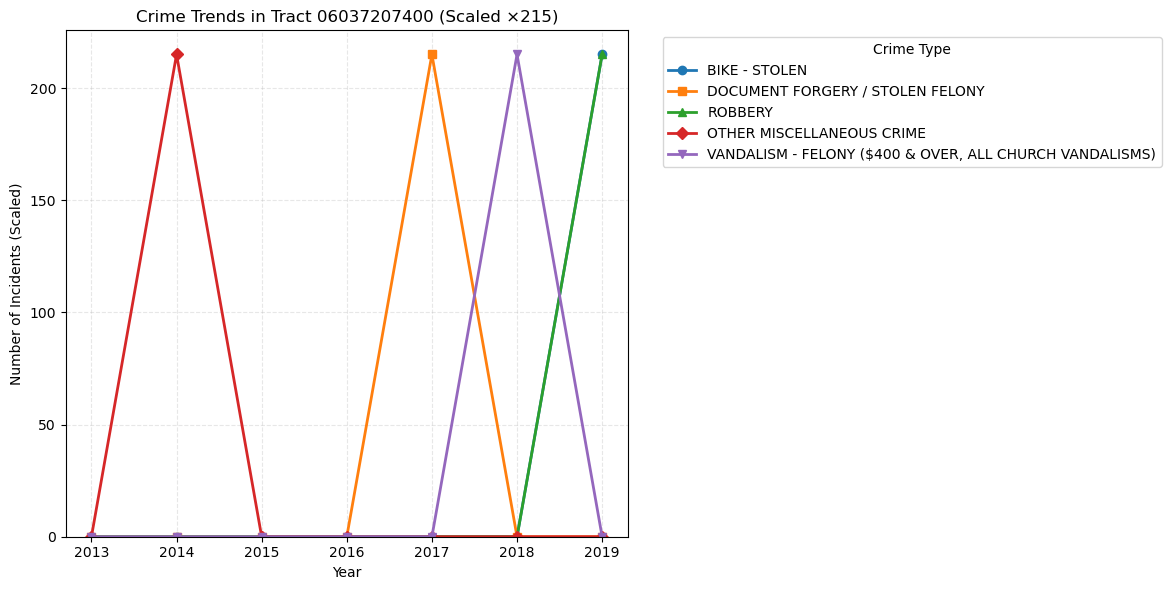

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


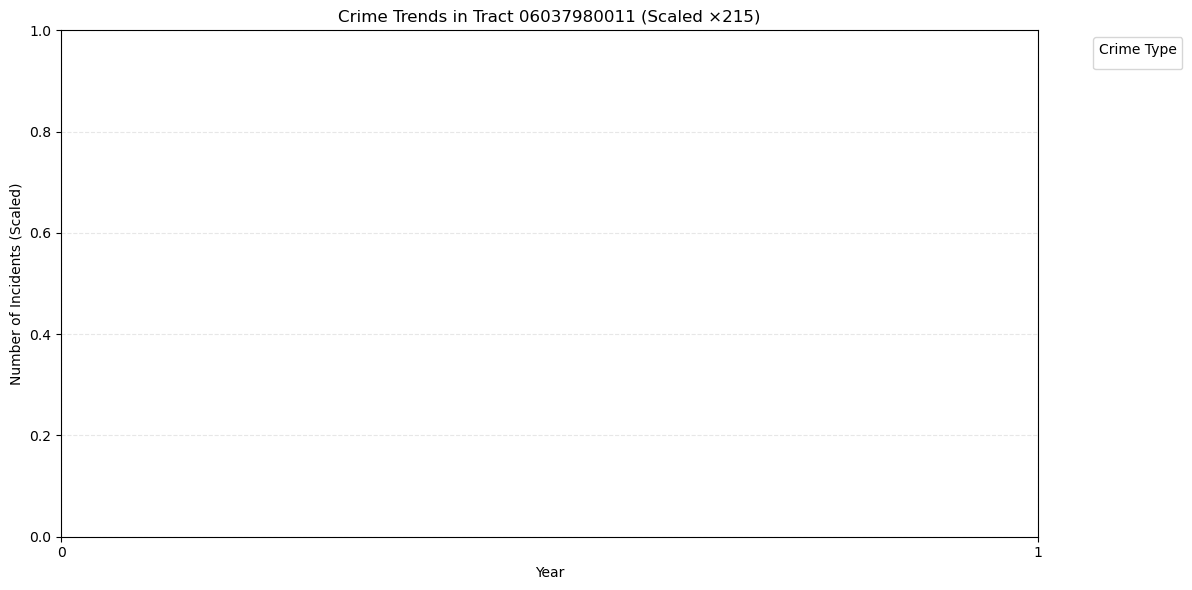

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


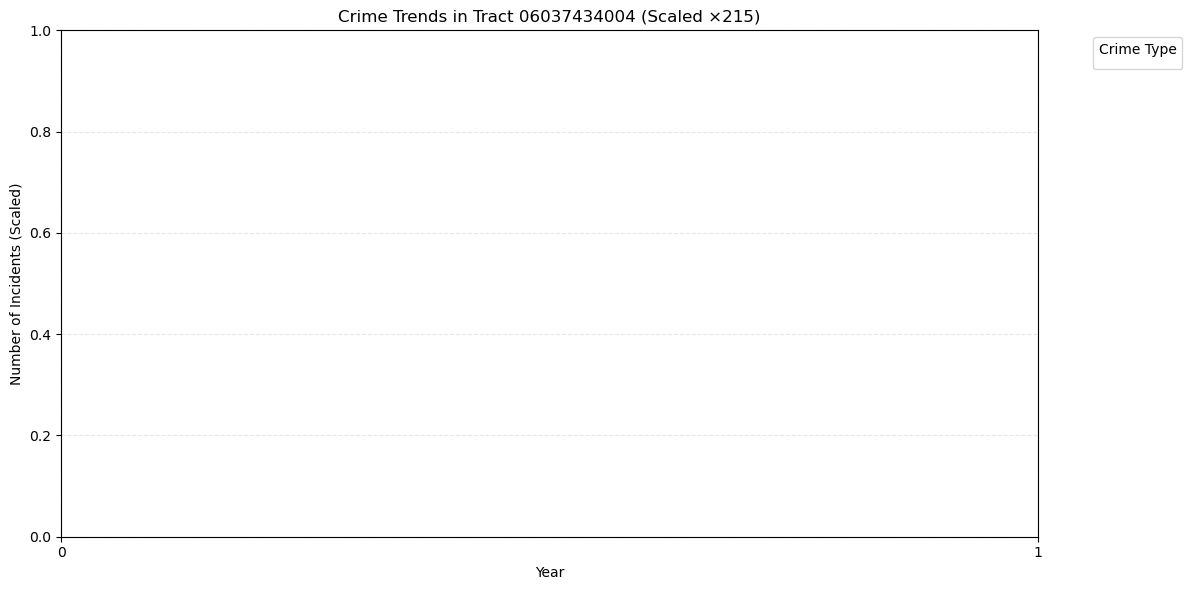

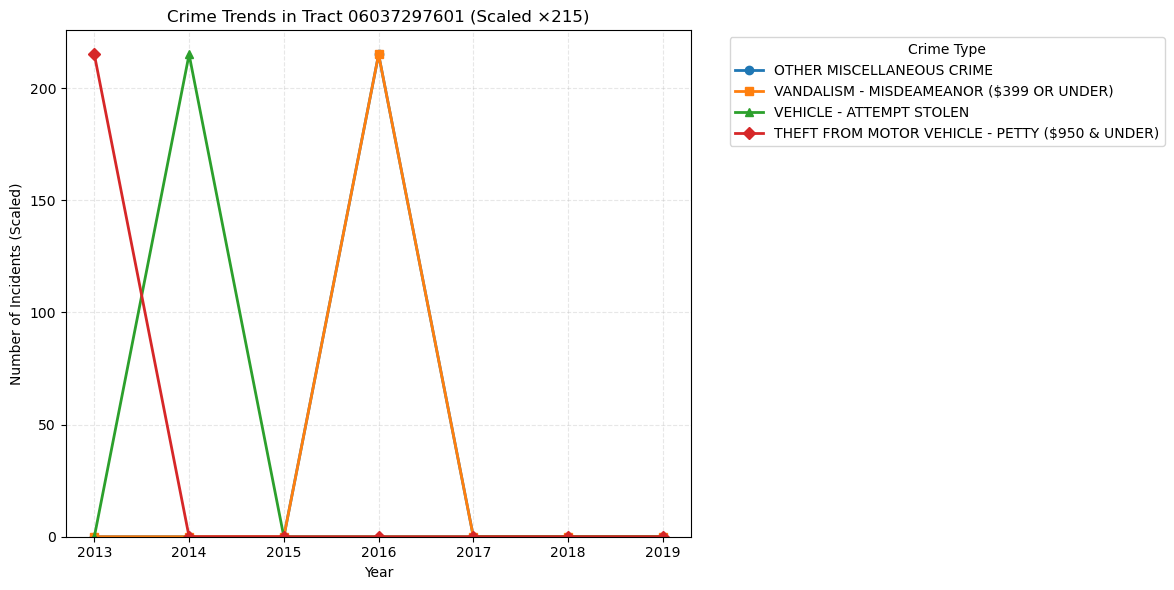

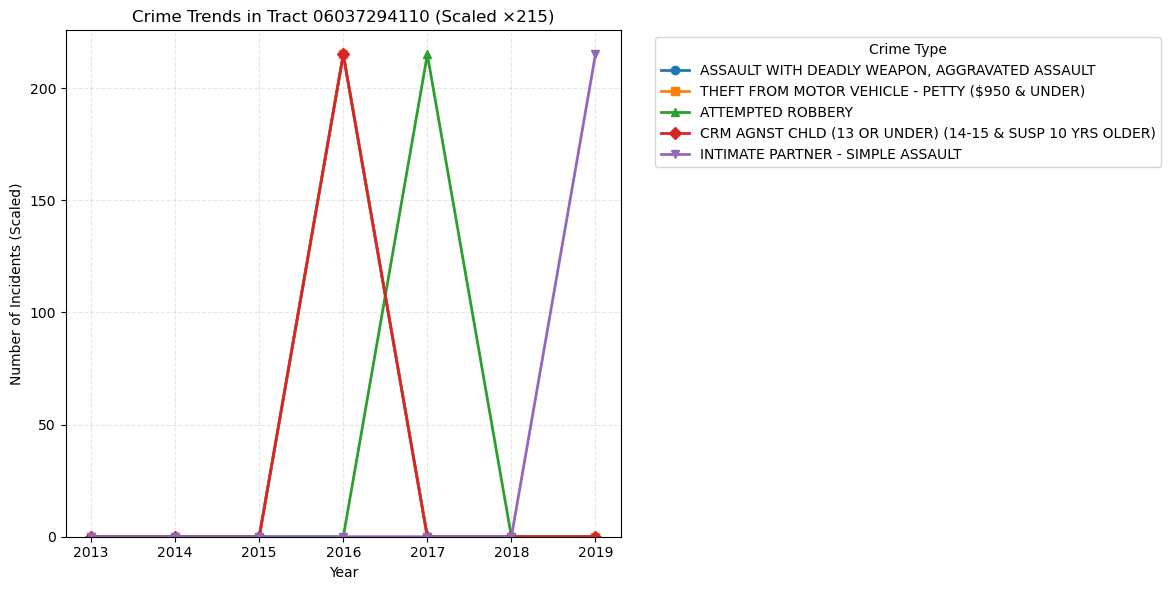

In [6]:
#visualization from the data above

# all the relevant imports for the code
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Load the merged crime + GEOID dataset
crime_df = pd.read_csv("crimes_with_geoids_projected.csv")

# Format the GEOID as an 11-digit string
crime_df['geoid'] = crime_df['geoid'].astype(str).str.zfill(11)

# Load or reuse the top_changers DataFrame here
# Extract the plain 11-digit GEOID
top_changers['geoid'] = top_changers['geoid'].astype(str).str.extract(r'(\d{11})')[0]

# Parse the occurrence date and drop invalid entries
crime_df['date_occ'] = pd.to_datetime(crime_df['date_occ'], errors='coerce')
crime_df = crime_df.dropna(subset=['date_occ'])

# Derive the year for each crime record
crime_df['year'] = crime_df['date_occ'].dt.year

# Filter only those crimes that fall into the top 5 tracts
filtered_crime_df = crime_df[crime_df['geoid'].isin(top_changers['geoid'])]

# Define the plotting function for crime trends
def plot_trends(df, geoids, scale_factor=215):
    for geoid in geoids:
        # Select data for this tract and time range 2013–2019
        local = df[(df['geoid'] == geoid) & (df['year'].between(2013, 2019))]
        
        # Identify the five most frequent crime descriptions
        top_crimes = local['crm_cd_desc'].value_counts().head(5).index.tolist()
        
        # Pivot to get annual counts for each top crime type
        pivot = local[local['crm_cd_desc'].isin(top_crimes)].pivot_table(
            index='year',
            columns='crm_cd_desc',
            values='crm_cd',
            aggfunc='count',
            fill_value=0
        ).reindex(range(2013, 2020), fill_value=0)
        
        # Scale the counts for better visual separation
        pivot *= scale_factor

        # Create the figure and axis
        fig, ax = plt.subplots(figsize=(12, 6))
        markers = ['o', 's', '^', 'D', 'v']

        # Plot each crime type as a separate line
        for i, crime in enumerate(top_crimes):
            ax.plot(pivot.index, pivot[crime], marker=markers[i % len(markers)], linewidth=2, label=crime)

        # Set the title and axis labels
        ax.set_title(f"Crime Trends in Tract {geoid} (Scaled ×{scale_factor})")
        ax.set_xlabel("Year")
        ax.set_ylabel("Number of Incidents (Scaled)")

        # Add grid and legend
        ax.grid(True, linestyle='--', alpha=0.3)
        ax.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')

        # Ensure y-axis starts at zero and x-axis uses integer ticks
        ax.set_ylim(bottom=0)
        ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

        # Adjust layout and display the plot
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

# Plot the crime trends for the top 5 tracts
plot_trends(filtered_crime_df, top_changers['geoid'].tolist())

Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the combined data set supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

According to Saket et al. (2019) the task that is supported by our visualization is called Characterize Distribution. In this task, the goal is to help viewers understand how values of a variable (in our case: crime type counts) are distributed over a time range. This applies to our plots as we show how frequently certain types of crimes occurred each year from 2013 to 2019 for specific LA tracts. The attribute of interest in our case is the crime category. By plotting the number of incidents per year for each of the five most frequent crime types in each tract, we help the viewer recognize trends such as spikes, declines, or stable periods in crime distribution.

The visualization is a multi-line chart showing five separate lines, one for each of the top five crime types within the selected tract. According to Saket et al., line charts are particularly well suited for distribution tasks. By plotting each crime type as a separate line over time, we can directly compare not just the trends per crime, but also how they evolve together across years in the same neighborhood. The shared x-axis (year) and clear color-coded categories allow for easy visual comparison and make temporal patterns in crime very accessible. This form of visualization also aligns with Saket et al.’s recommendation for using line charts when accuracy over time is important, which is clearly the case in our temporal analysis.

Our visualization shows, for each of the five tracts with the largest absolute change in income distribution between 2014 and 2019, how the top five crime types changed in frequency over the years 2013 to 2019. Each plot is dedicated to one specific census tract (identified by its GEOID), and each line represents one type of crime. The number of recorded incidents for that crime type is plotted for each year. Some tracts (e.g. 06037207400) show scattered but diverse crime occurrences, while others (e.g. 06037980011) have almost no activity, indicating possible social or geographic explanations (such as low population, industrial zones, or gated communities). What’s interesting is that some tracts with a strong positive income shift still show low crime rates, while others with negative shifts (areas becoming poorer) show spikes in specific crimes such as theft or shoplifting. These patterns do not follow a consistent trend, but rather reveal localized and diverse dynamics.

The visualization contributes directly to answering our central project question: How does crime behave in relation to income change? What becomes clear from the visualization is that the relationship between income change and crime is not simple or linear. Some tracts that experienced a significant increase in income did not show a corresponding decrease in crime. In fact, in a few cases, crime remained stable or even increased slightly despite rising wealth. On the other hand, some neighborhoods that became poorer did not show the expected rise in criminal activity. In fact, they sometimes exhibited low levels of reported crime overall. This suggests that income alone may not be the strongest predictor of crime. Instead, the results point to the influence of other contextual factors such as local policies, housing structures, policing intensity, and population density. The visualization highlights these inconsistencies by offering a tract-level, time-based view of the top five crime types in each area, allowing us to see the year-by-year developments and identify whether any clear patterns emerge. Rather than confirming a strict correlation, the visualization supports an exploratory analysis that encourages us to look deeper into neighborhood-specific dynamics. It allows us to move beyond generalizations and instead focus on local cases that may reflect unique social, economic, or environmental conditions. In this way, the visualization is essential for generating new hypotheses about how crime responds to social change, and it contributes to a more nuanced understanding of public safety in an urban context.

-----
## Step 4  (1 points)

Persist the merged dataset from Step 3 as a file.

In [5]:
# the merged dataset was created in the step above and can be found in the following directory: "./data/merged_crime_geoid_dataset.csv"